In [ ]:
#1. Carga y exploración inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("movies.csv")

print("Dimensiones iniciales:", df.shape)
df.head()

In [13]:
#Diagnóstico estructural

print("Tipos de datos:")
print(df.dtypes)

print("\nDuplicados:", df.duplicated().sum())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nPorcentaje de nulos:")
print((df.isnull().sum() / len(df)) * 100)

Tipos de datos:
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

Duplicados: 431

Valores nulos por columna:
MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

Porcentaje de nulos:
MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64


In [14]:
#Eliminación de duplicados

filas_antes = len(df)
df = df.drop_duplicates()
filas_despues = len(df)

print("Duplicados eliminados:", filas_antes - filas_despues)
print("Dimensiones actuales:", df.shape)

Duplicados eliminados: 431
Dimensiones actuales: (9568, 9)


In [15]:
# Eliminación de variable con exceso de nulos (Gross)
df = df.drop(columns=["Gross"])
print("Columnas actuales:")
print(df.columns)

Columnas actuales:
Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime'],
      dtype='object')


In [16]:
# Limpieza y corrección de tipos
df["YEAR"] = df["YEAR"].str.extract(r'(\d{4})')
df["YEAR"] = pd.to_numeric(df["YEAR"], errors="coerce")
df["VOTES"] = df["VOTES"].str.replace(",", "", regex=True)
df["VOTES"] = pd.to_numeric(df["VOTES"], errors="coerce")

In [17]:
# Tratamiento de valores nulos
# Numéricas → mediana
df["RunTime"] = df["RunTime"].fillna(df["RunTime"].median())
df["RATING"] = df["RATING"].fillna(df["RATING"].median())
df["VOTES"] = df["VOTES"].fillna(df["VOTES"].median())
df["YEAR"] = df["YEAR"].fillna(df["YEAR"].median())

#Categórica → moda
df["GENRE"] = df["GENRE"].fillna(df["GENRE"].mode()[0])


In [19]:
# Verificación después de limpieza

print("Duplicados finales duplicados:", df.duplicated().sum())
print("Nulos finales:")
print(df.isnull().sum())

print("Tipos finales:")
print(df.dtypes)

print("Dimensiones finales:", df.shape)

Duplicados finales duplicados: 0
Nulos finales:
MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64
Tipos finales:
MOVIES       object
YEAR        float64
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
dtype: object
Dimensiones finales: (9568, 8)


In [20]:
# Detección de Outliers (IQR en RATING)
Q1 = df["RATING"].quantile(0.25)
Q3 = df["RATING"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = df[(df["RATING"] < lim_inf) | (df["RATING"] > lim_sup)]

print("Cantidad de outliers:", len(outliers))

Cantidad de outliers: 459


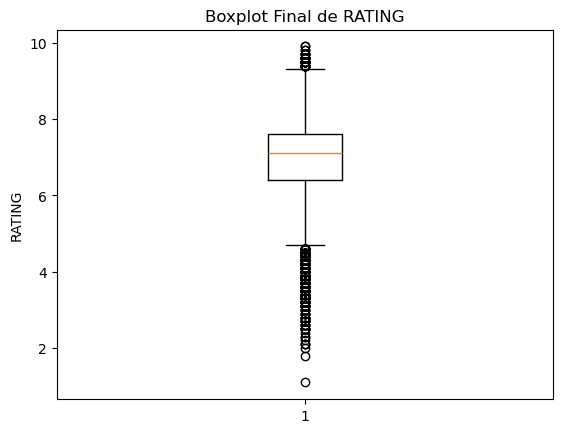

In [21]:
# Boxplot final
plt.figure()
plt.boxplot(df["RATING"])
plt.title("Boxplot Final de RATING")
plt.ylabel("RATING")
plt.show()

In [22]:
# Normalización Min-Max (RunTime)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["RunTime_Normalized"] = scaler.fit_transform(df[["RunTime"]])

df["RunTime_Normalized"].describe()

count    9568.000000
mean        0.076878
std         0.047714
min         0.000000
25%         0.051643
50%         0.069249
75%         0.100939
max         1.000000
Name: RunTime_Normalized, dtype: float64

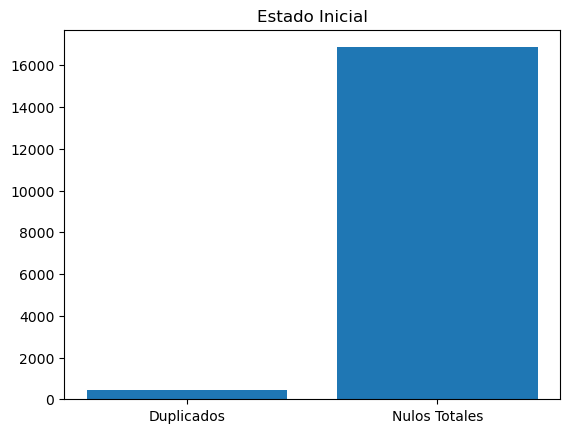

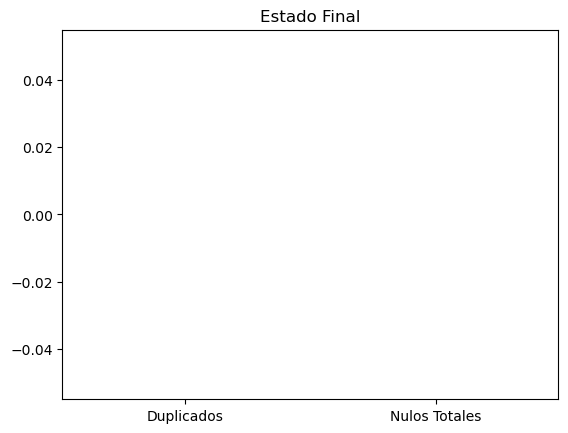

In [23]:
# Para comparación inicial necesitamos recalcular desde el dataset original
df_original = pd.read_csv("movies.csv")

duplicados_inicial = df_original.duplicated().sum()
nulos_inicial = df_original.isnull().sum().sum()

duplicados_final = df.duplicated().sum()
nulos_final = df.isnull().sum().sum()

plt.figure()
plt.bar(["Duplicados", "Nulos Totales"], [duplicados_inicial, nulos_inicial])
plt.title("Estado Inicial")
plt.show()

plt.figure()
plt.bar(["Duplicados", "Nulos Totales"], [duplicados_final, nulos_final])
plt.title("Estado Final")
plt.show()